In [1]:
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd
import missingno
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from sklearn import ensemble
from sklearn.metrics import confusion_matrix as cm
from scipy.stats import norm

In [2]:
startups = pd.read_csv("../input/tablet/tablet.csv")
df = startups.copy()

Veri setimizin ilk 5 gözlemini ekrana yazdırıyorum.

In [3]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


Veri setimizde ki öznitelikleri görelim şimdi

In [4]:
df.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'],
      dtype='object')

Veri setimizin kaç gözlem ve kaç öznitelikten oluştuğuna bakalım

In [5]:
df.shape

(2000, 20)

info( ) fonksiyonu ile veri çerçevesinin bellekte kapladığı alanı ve değişken tiplerini görüntülüyoruz.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

Her bir değişkenden kaç veri eksik onu öğrenmiş oluyoruz

In [7]:
df.isnull().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

Her bir özniteliğin bir birinden farklı kaç değere sahip olduğunu ve bu değerlerin neler olduğunu ekrana yazdırıyoruz

In [8]:
df["BataryaGucu"].nunique()

1094

In [9]:
df["BataryaGucu"].unique()

array([1325, 1046,  843, ...,  990, 1372, 1501])

In [10]:
df["Bluetooth"].nunique()

2

In [11]:
df["Bluetooth"].unique()

array(['Yok', 'Var'], dtype=object)

In [12]:
df["Bluetooth"].value_counts()

Yok    1010
Var     990
Name: Bluetooth, dtype: int64

In [13]:
df["MikroislemciHizi"].nunique()

26

In [14]:
df["MikroislemciHizi"].unique()

array([1.9, 2.8, 1.3, 0.5, 1. , 0.8, 0.6, 1.7, 2.1, 2.2, 2. , 1.8, 2.5,
       0.7, 1.5, 3. , 2.3, 2.7, 1.4, 1.1, 2.4, 2.9, 1.6, 1.2, 2.6, 0.9])

In [15]:
df["MikroislemciHizi"].value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
2.4     58
0.8     58
0.9     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: MikroislemciHizi, dtype: int64

In [16]:
df["CiftHat"].nunique()

2

In [17]:
df["CiftHat"].unique()

array(['Yok', 'Var'], dtype=object)

In [18]:
df["CiftHat"].value_counts()

Var    1019
Yok     981
Name: CiftHat, dtype: int64

In [19]:
df["OnKameraMP"].nunique()

20

In [20]:
df["OnKameraMP"].unique()

array([ 2.,  0.,  1., 12.,  9., 10.,  4.,  7., 13., 11.,  5.,  3.,  6.,
        8., 14., 16., 18., 15., nan, 19., 17.])

In [21]:
df["OnKameraMP"].value_counts()

0.0     471
1.0     245
2.0     189
3.0     170
5.0     139
4.0     133
6.0     112
7.0     100
9.0      78
8.0      75
10.0     62
11.0     51
12.0     45
13.0     40
16.0     24
15.0     23
14.0     20
18.0     11
17.0      6
19.0      1
Name: OnKameraMP, dtype: int64

Telefonların 471 tanesinde 0.0 yazıyor ön kameranın Mp si için burdan bir çıkarım yapmak gerekirse bu 471 tane telefonun ön kamerası olmamasıdır.Diğer türlü none ifadeleri kullanılabilirdi ama bu veri setinde none ifadesi o verinin belirtilmediği anlamına geliyor.

In [22]:
df["4G"].nunique()

2

In [23]:
df["4G"].unique()

array(['Yok', 'Var'], dtype=object)

In [24]:
df["4G"].value_counts()

Var    1043
Yok     957
Name: 4G, dtype: int64

In [25]:
df["DahiliBellek"].nunique()

63

In [26]:
df["DahiliBellek"].unique()

array([50, 58, 16, 18, 29, 55, 13, 21,  7,  8,  2, 20, 42, 61, 33, 49, 30,
       23,  6, 24, 19, 52, 60, 51, 59, 15, 56, 54, 12, 11, 31, 22, 10, 53,
       63, 36, 40,  3, 41, 32, 46, 25,  9, 57, 34, 37, 27, 26, 64, 39, 14,
       35, 62, 47, 17,  4, 38, 28, 48,  5, 45, 43, 44])

In [27]:
df["Kalinlik"].nunique()

10

In [28]:
df["Kalinlik"].unique()

array([0.1, 0.2, 0.9, 0.5, 0.7, 0.3, 1. , 0.8, 0.6, 0.4])

In [29]:
df["Kalinlik"].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: Kalinlik, dtype: int64

In [30]:
df["Agirlik"].nunique()

121

In [31]:
df["Agirlik"].unique()

array([146, 100, 119, 199, 153, 104, 181,  83, 105, 145, 151, 191,  91,
       193, 129, 101, 114, 177, 142, 133, 123, 149,  88,  97, 198, 162,
       124, 156, 161, 120, 147, 131, 154, 108, 192,  98, 179, 200, 122,
       185, 196, 197, 167, 136,  95, 135, 187,  87, 163, 103, 165, 134,
       113, 141, 125, 117, 102, 169, 178, 144, 184, 160, 127,  99,  84,
       152,  86, 112, 121, 143, 176,  93, 130,  90, 148,  89,  80, 166,
       190,  81, 106, 137, 132, 157, 183, 172, 189,  92,  82, 126, 138,
       174, 170, 164, 140, 109,  94, 139, 111, 173, 155,  85, 159, 182,
       188, 194, 107, 118, 195, 180, 186, 110, 158, 175, 150, 168, 128,
       171, 116,  96, 115])

In [32]:
df["CekirdekSayisi"].nunique()

8

In [33]:
df["CekirdekSayisi"].unique()

array([1, 8, 7, 3, 4, 6, 5, 2])

In [34]:
df["CekirdekSayisi"].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: CekirdekSayisi, dtype: int64

In [35]:
df["ArkaKameraMP"].nunique()

21

In [36]:
df["ArkaKameraMP"].unique()

array([10,  0,  4, 14, 18, 12,  3, 20, 13, 19, 17, 15,  9,  7,  5,  1,  6,
        2, 11,  8, 16])

In [37]:
df["ArkaKameraMP"].value_counts()

10    122
7     119
9     112
20    110
14    104
1     104
0     101
2      99
17     99
4      95
6      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: ArkaKameraMP, dtype: int64

Ön kamerada dediklerimizin aynısı arka kamera içinde geçerli burda ise arka kamerası olmayan toplam 101 telefon olduğunu görüyoruz.

In [38]:
df["CozunurlukYükseklik"].nunique()

1137

In [39]:
df["CozunurlukYükseklik"].unique()

array([ 499,  259,  593, ...,  487, 1184,  672])

In [40]:
df["CozunurlukGenislik"].nunique()

1109

In [41]:
df["CozunurlukGenislik"].unique()

array([ 695, 1040,  732, ..., 1252, 1719, 1359])

In [42]:
df["RAM"].nunique()

1554

In [43]:
df["RAM"].unique()

array([2328., 3863., 1734., ..., 3557., 3653., 2273.])

In [44]:
df["BataryaOmru"].nunique()

19

In [45]:
df["BataryaOmru"].unique()

array([ 2,  9, 14,  6,  3, 15,  4, 16,  8,  7, 11, 13, 10, 18,  5, 20, 19,
       12, 17])

In [46]:
df["BataryaOmru"].value_counts()

7     124
4     123
16    116
15    115
19    113
6     111
10    105
8     104
11    103
20    102
14    101
13    100
9     100
18    100
12     99
2      99
17     98
3      94
5      93
Name: BataryaOmru, dtype: int64

In [47]:
df["3G"].nunique()

2

In [48]:
df["3G"].unique()

array(['Var', 'Yok'], dtype=object)

In [49]:
df["3G"].value_counts()

Var    1523
Yok     477
Name: 3G, dtype: int64

In [50]:
df["Dokunmatik"].nunique()

2

In [51]:
df["Dokunmatik"].unique()

array(['Yok', 'Var'], dtype=object)

In [52]:
df["Dokunmatik"].value_counts()

Var    1006
Yok     994
Name: Dokunmatik, dtype: int64

In [53]:
df["WiFi"].nunique()

2

In [54]:
df["WiFi"].unique()

array(['Yok', 'Var'], dtype=object)

In [55]:
df["WiFi"].value_counts()

Var    1014
Yok     986
Name: WiFi, dtype: int64

In [56]:
df["FiyatAraligi"].nunique()

4

In [57]:
df["FiyatAraligi"].unique()

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [58]:
df["Renk"].nunique()

12

In [59]:
df["Renk"].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

In [60]:
df["Renk"].value_counts()

Beyaz         194
Siyah         183
Mor           175
Turuncu       175
Pembe         168
Kırmızı       168
Turkuaz       167
Kahverengi    157
Sarı          156
Yeşil         154
Gri           153
Mavi          150
Name: Renk, dtype: int64

Veri setimizde ki sayısal değişkenler için temel istatistik bilgileri bize gösterir.

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


Şimdi bu değişkenlerin birbirleriyle olan ilişkilerini görüntüleme zamanı

In [62]:
df.corr()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


Grafiğin ısı haritasını çizdirip daha kolay bir şekilde yorumlama yapabiliriz

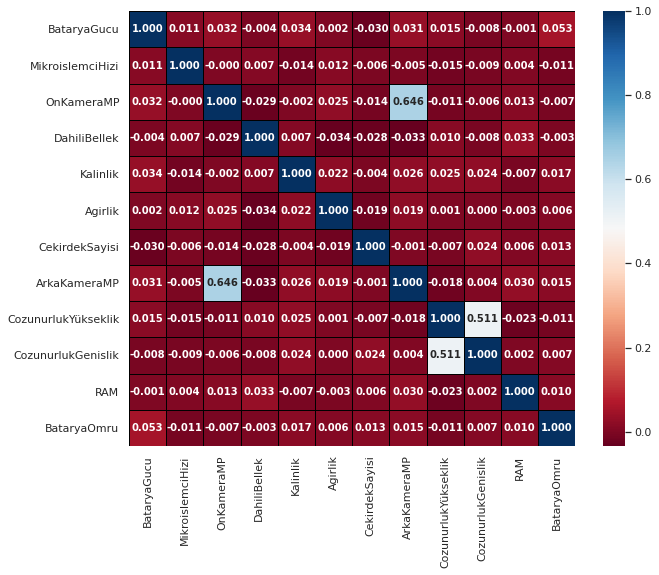

In [63]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values,
           annot = True,
           cmap = "RdBu",
           fmt = ".3f",
           linewidth = 1,
           linecolor = "black",
           cbar =True,
           annot_kws ={
               "fontsize":10,
               "fontweight":"bold"
           });
plt.show()

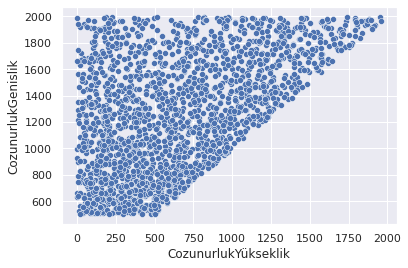

In [64]:
sns.scatterplot(x = "CozunurlukYükseklik", y = "CozunurlukGenislik", data = df);

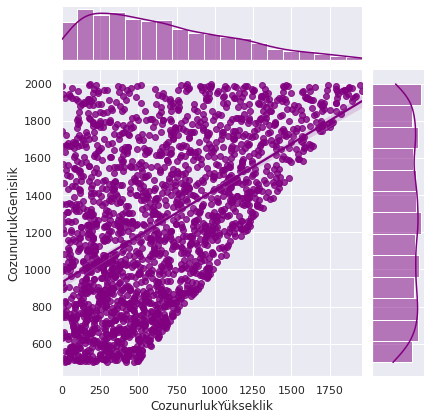

In [65]:
sns.jointplot(x = "CozunurlukYükseklik", y = "CozunurlukGenislik", data = df,color = "purple" ,kind = "reg");

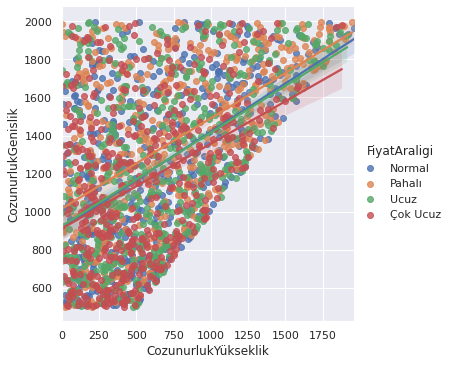

In [66]:
sns.lmplot(x = "CozunurlukYükseklik", y = "CozunurlukGenislik", data = df,hue ="FiyatAraligi")

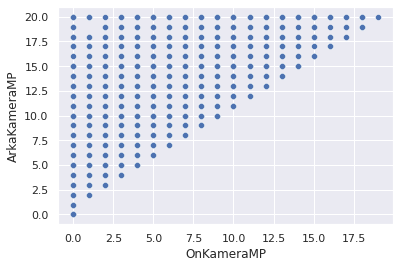

In [67]:
sns.scatterplot(x = "OnKameraMP", y = "ArkaKameraMP", data = df);

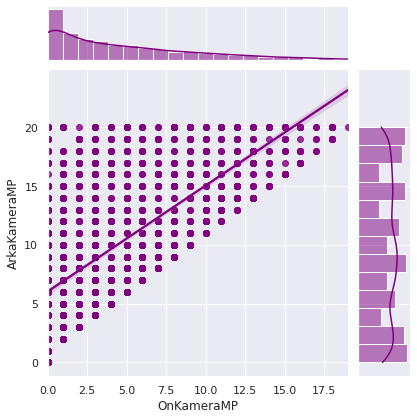

In [68]:
sns.jointplot(x = "OnKameraMP", y = "ArkaKameraMP", data = df,color = "purple" ,kind = "reg");

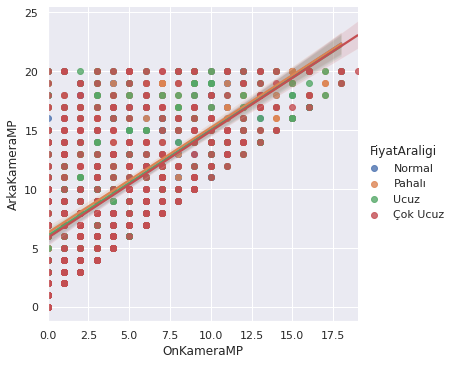

In [69]:
sns.lmplot(x = "OnKameraMP", y = "ArkaKameraMP", data = df,hue ="FiyatAraligi")

Yukarıda ki grafiğe bakarsak elimizdeki veri setine göre çoğunlukla ön kamerası kötü olanların bulunduğunu ön kamerası iyi olan telefonların sayısının az olduğunu anlayabiliyoruz. arka kamera için ise her türden yaklaşık birbirine yakın sayıda adete sahip olduğunu da anlayabiliyoruz.

**Fiyat Aralığına göre telefonların dağılımını göreceğiz

<AxesSubplot:xlabel='FiyatAraligi', ylabel='count'>

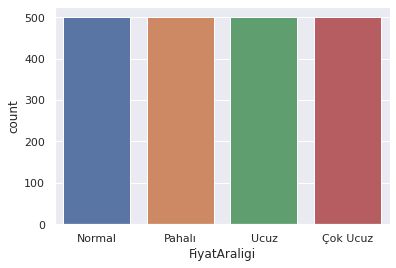

In [70]:
sns.countplot(x = "FiyatAraligi", data = df)

Yukarda ki grafiğe göre fiyat aralığında(Normal,Pahalı,Ucuz,Çok Ucuz) herbiri için eşit miktarda telefon kaydı bulunduğunu görmüş olduk

Aşağıda bulunan describe lardan min değerlerinden sıfır olanlarada bakabiliriz.

In [71]:
df.groupby(["FiyatAraligi"]).describe()["BataryaGucu"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,1228.320,452.863065,501.0,816.50,1219.5,1635.75,1998.0
Pahalı,500.0,1379.984,414.992261,503.0,1034.75,1449.5,1733.50,1994.0
Ucuz,500.0,1228.868,438.614528,501.0,843.00,1206.0,1596.25,1996.0
Çok Ucuz,500.0,1116.902,410.801305,503.0,770.50,1066.0,1431.25,1994.0


In [72]:
df.groupby(["FiyatAraligi"]).describe()["MikroislemciHizi"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,1.5298,0.804404,0.5,0.7,1.50,2.2,3.0
Pahalı,500.0,1.5204,0.796450,0.5,0.7,1.50,2.2,3.0
Ucuz,500.0,1.4886,0.814479,0.5,0.6,1.50,2.2,3.0
Çok Ucuz,500.0,1.5502,0.848941,0.5,0.6,1.55,2.3,3.0


In [73]:
df.groupby(["FiyatAraligi"]).describe()["OnKameraMP"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,4.498000,4.347390,0.0,1.0,3.0,7.0,18.0
Pahalı,500.0,4.316000,4.332399,0.0,1.0,3.0,7.0,18.0
Ucuz,500.0,4.340000,4.499432,0.0,1.0,3.0,7.0,18.0
Çok Ucuz,495.0,4.092929,4.185411,0.0,1.0,3.0,6.0,19.0


Aslında yukarıdaki tabloya baktığımızda bizim On kamerada ki eksik bilgilerin 'Çok Ucuz' da olduğunu gösteriyor

In [74]:
df.groupby(["FiyatAraligi"]).describe()["DahiliBellek"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,30.920,18.441958,2.0,15.0,30.0,48.0,64.0
Pahalı,500.0,33.976,17.930377,2.0,18.0,34.5,49.0,64.0
Ucuz,500.0,32.116,18.000739,2.0,16.0,32.0,47.0,64.0
Çok Ucuz,500.0,31.174,18.101023,2.0,15.0,30.0,47.0,64.0


In [75]:
df.groupby(["FiyatAraligi"]).describe()["Kalinlik"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,0.4908,0.286215,0.1,0.2,0.5,0.7,1.0
Pahalı,500.0,0.5020,0.291901,0.1,0.2,0.5,0.8,1.0
Ucuz,500.0,0.5240,0.286895,0.1,0.3,0.5,0.8,1.0
Çok Ucuz,500.0,0.4902,0.288184,0.1,0.2,0.5,0.7,1.0


In [76]:
df.groupby(["FiyatAraligi"]).describe()["Agirlik"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,143.614,34.320326,80.0,114.00,145.0,172.0,200.0
Pahalı,500.0,136.320,34.911994,80.0,104.00,134.0,165.0,200.0
Ucuz,500.0,140.510,35.678956,80.0,109.00,141.0,170.0,200.0
Çok Ucuz,500.0,140.552,36.378319,80.0,108.75,142.0,173.0,200.0


In [77]:
df.groupby(["FiyatAraligi"]).describe()["CekirdekSayisi"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,4.682,2.262546,1.0,3.0,5.0,7.0,8.0
Pahalı,500.0,4.502,2.297074,1.0,2.0,5.0,7.0,8.0
Ucuz,500.0,4.298,2.311684,1.0,2.0,4.0,6.0,8.0
Çok Ucuz,500.0,4.600,2.268544,1.0,3.0,5.0,7.0,8.0


In [78]:
df.groupby(["FiyatAraligi"]).describe()["ArkaKameraMP"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,10.018,5.952861,0.0,5.0,10.0,15.0,20.0
Pahalı,500.0,10.150,6.085521,0.0,5.0,10.0,16.0,20.0
Ucuz,500.0,9.924,6.124806,0.0,4.0,10.0,15.0,20.0
Çok Ucuz,500.0,9.574,6.095805,0.0,4.0,9.5,15.0,20.0


In [79]:
df.groupby(["FiyatAraligi"]).describe()["CozunurlukYükseklik"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,632.284,445.789232,10.0,252.50,538.5,942.75,1960.0
Pahalı,500.0,744.848,483.720179,0.0,341.75,674.0,1109.50,1949.0
Ucuz,500.0,666.892,441.351209,0.0,327.25,606.0,944.25,1914.0
Çok Ucuz,500.0,536.408,372.824164,1.0,229.00,465.5,776.50,1878.0


In [80]:
df.groupby(["FiyatAraligi"]).describe()["CozunurlukGenislik"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,1234.046,427.757151,508.0,862.50,1221.5,1613.25,1997.0
Pahalı,500.0,1369.838,426.823571,501.0,1041.50,1415.5,1746.25,1995.0
Ucuz,500.0,1251.908,433.564352,500.0,878.75,1223.0,1629.00,1998.0
Çok Ucuz,500.0,1150.270,413.001780,500.0,805.75,1132.5,1452.75,1989.0


In [81]:
df.groupby(["FiyatAraligi"]).describe()["RAM"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,2582.81600,496.211735,1185.0,2292.75,2577.0,2927.00,3916.0
Pahalı,488.0,3449.35041,390.975480,2259.0,3207.50,3504.5,3764.75,3998.0
Ucuz,500.0,1679.49000,465.850159,387.0,1354.00,1686.5,2033.75,2811.0
Çok Ucuz,500.0,785.31400,362.755397,256.0,488.75,719.5,1037.00,1974.0


Yukarıdaki tabloya baktığımız zaman ramde ki eksik verilerin Pahalı grubunda olmuş olduğunu görüyoruz ayrıca değerleri incelediğimizde de ayırt ediciliği yüksek bir öznitelik olduğunu görüyoruz.

In [82]:
df.groupby(["FiyatAraligi"]).describe()["BataryaOmru"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,10.972,5.433070,2.0,6.0,11.0,16.0,20.0
Pahalı,500.0,11.098,5.443129,2.0,7.0,11.0,16.0,20.0
Ucuz,500.0,11.362,5.570729,2.0,7.0,12.0,16.0,20.0
Çok Ucuz,500.0,10.612,5.397009,2.0,6.0,10.0,15.0,20.0


In [83]:
df[df["CozunurlukYükseklik"] == 0]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
662,897,Var,2.0,Yok,3.0,Var,2,0.6,154,8,10,0,994,1958.0,7,Var,Var,Yok,Ucuz,Mor
856,1834,Yok,2.1,Yok,7.0,Var,40,0.1,99,4,11,0,1987,3692.0,16,Var,Var,Yok,Pahalı,Siyah


istatiklerine baktığımız sırada CozunurlukYüksekliklerinde min değerinin sıfır olduğunu gördük ve acaba kaç tane bu değere sahip gözlem var diye yukarıdaki kodu yazıp baktık.

Ayrıca Çözünürlüğün Yüksekliğin değeri 0 ken Cozünürlük değerinin genişliğinin 0 dan farklı olmasıda garip büyük ihtimalle burada girilmiş olan sıfır değerleri asıl değerleri girilmediği için konulmuştur.Şimdi bunların yerine ne girmemiz gerektiğini yorumlayabilmek için tekrardan istatiksel bilgilerden yaralanacağız.

In [84]:
df.loc[662,"CozunurlukYükseklik"] = 666
df.loc[856,"CozunurlukYükseklik"] = 744

In [85]:
df[df["CozunurlukYükseklik"] == 0]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk


Yukarda şu işlemleri yaptık bilgileri tam girilmemiş iki bilginin fiyat aralıklarına göre gruplayarak CozunurlukYükseklik ortalamalarını girdik.

# GRAFİKLER

<AxesSubplot:xlabel='Bluetooth', ylabel='count'>

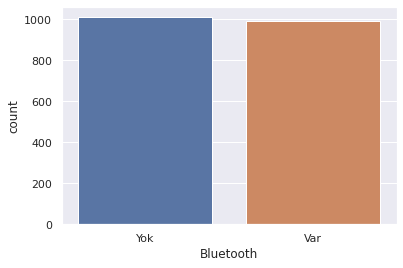

In [86]:
sns.countplot(x = "Bluetooth", data = df)

<AxesSubplot:xlabel='CiftHat', ylabel='count'>

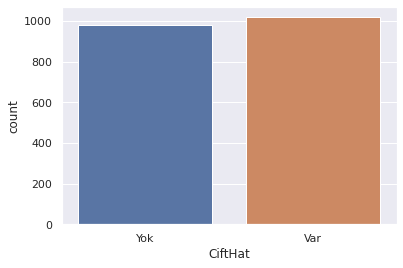

In [87]:
sns.countplot(x = "CiftHat", data = df)

<AxesSubplot:xlabel='4G', ylabel='count'>

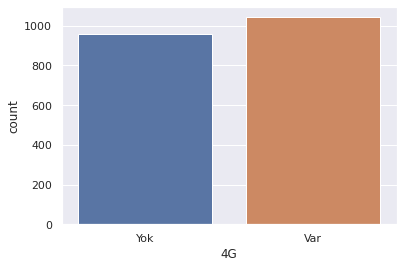

In [88]:
sns.countplot(x = "4G", data = df)

<AxesSubplot:xlabel='3G', ylabel='count'>

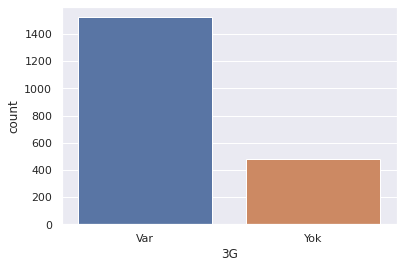

In [89]:
sns.countplot(x = "3G", data = df)

<AxesSubplot:xlabel='Dokunmatik', ylabel='count'>

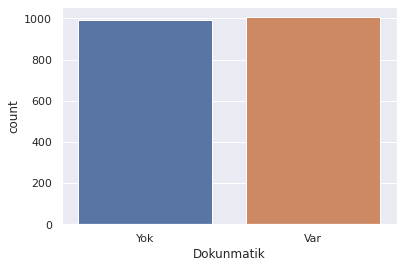

In [90]:
sns.countplot(x = "Dokunmatik", data = df)

<AxesSubplot:xlabel='WiFi', ylabel='count'>

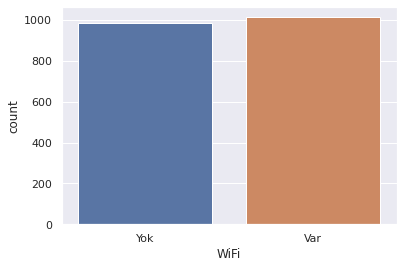

In [91]:
sns.countplot(x = "WiFi", data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BataryaGucu', ylabel='Density'>

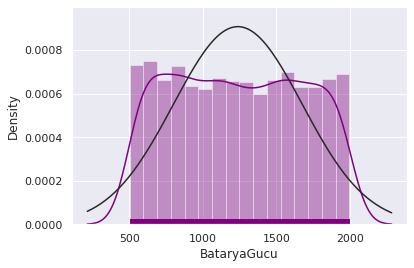

In [92]:
sns.distplot(df["BataryaGucu"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='BataryaGucu'>

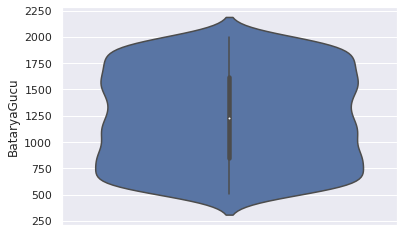

In [93]:
sns.violinplot(y = "BataryaGucu",data = df)

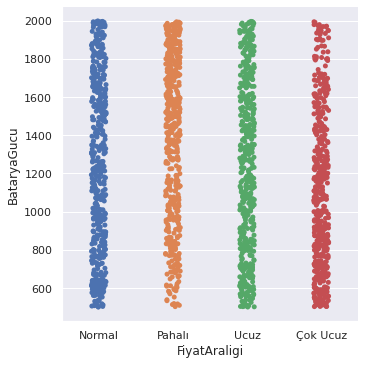

In [94]:
sns.catplot(x = "FiyatAraligi" , y = "BataryaGucu" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='BataryaGucu'>

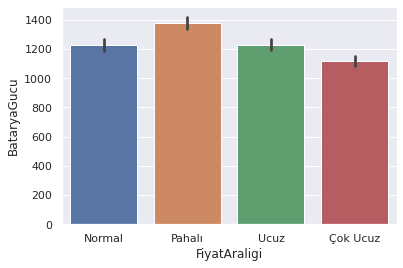

In [95]:
sns.barplot(x = "FiyatAraligi" , y = "BataryaGucu" ,data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MikroislemciHizi', ylabel='Density'>

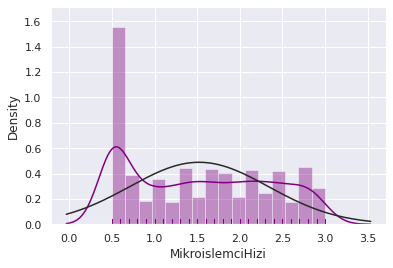

In [96]:
sns.distplot(df["MikroislemciHizi"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='MikroislemciHizi'>

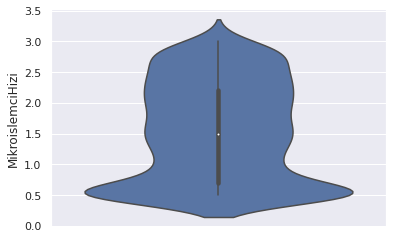

In [97]:
sns.violinplot(y = "MikroislemciHizi",data = df)

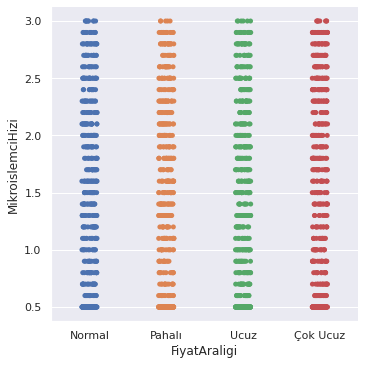

In [98]:
sns.catplot(y = "MikroislemciHizi" , x = "FiyatAraligi" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='MikroislemciHizi'>

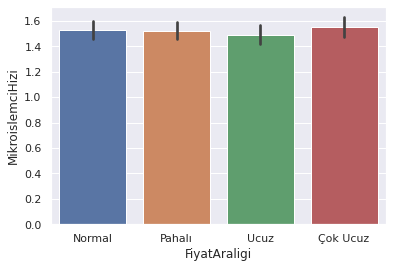

In [99]:
sns.barplot(y = "MikroislemciHizi" , x = "FiyatAraligi" ,data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OnKameraMP', ylabel='Density'>

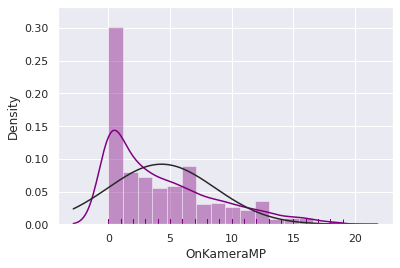

In [100]:
sns.distplot(df["OnKameraMP"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='OnKameraMP'>

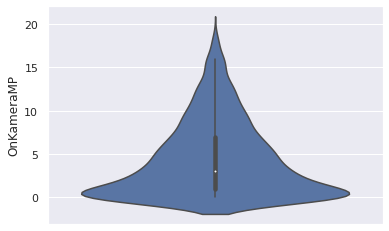

In [101]:
sns.violinplot(y = "OnKameraMP",data = df)

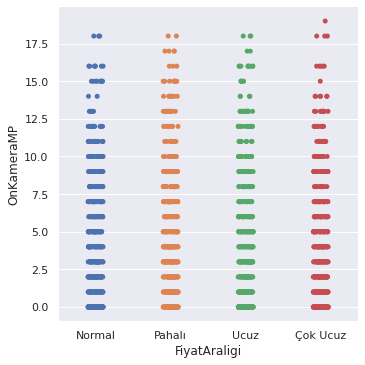

In [102]:
sns.catplot(x = "FiyatAraligi" , y = "OnKameraMP" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='OnKameraMP'>

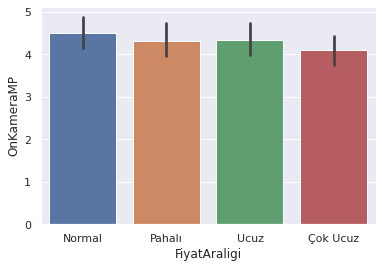

In [103]:
sns.barplot(x = "FiyatAraligi" , y = "OnKameraMP" ,data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DahiliBellek', ylabel='Density'>

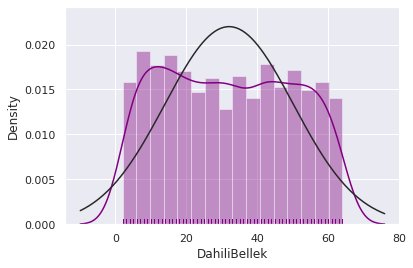

In [104]:
sns.distplot(df["DahiliBellek"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='DahiliBellek'>

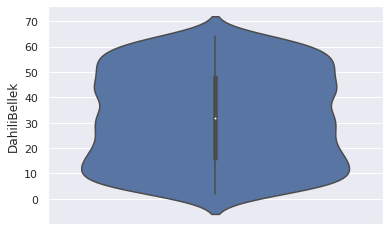

In [105]:
sns.violinplot(y = "DahiliBellek",data = df)

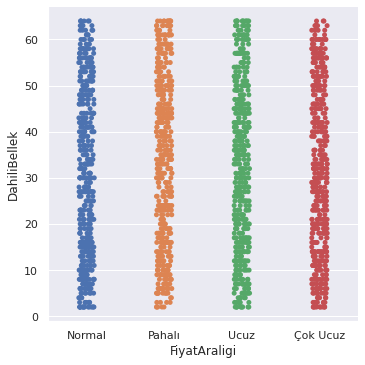

In [106]:
sns.catplot(x = "FiyatAraligi" , y = "DahiliBellek" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='DahiliBellek'>

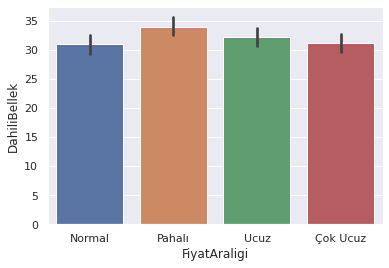

In [107]:
sns.barplot(x = "FiyatAraligi" , y = "DahiliBellek" ,data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kalinlik', ylabel='Density'>

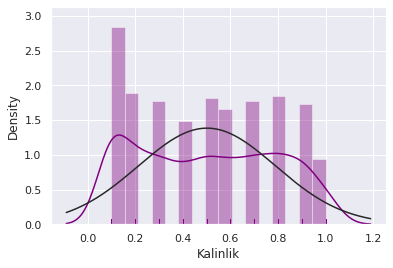

In [108]:
sns.distplot(df["Kalinlik"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='Kalinlik'>

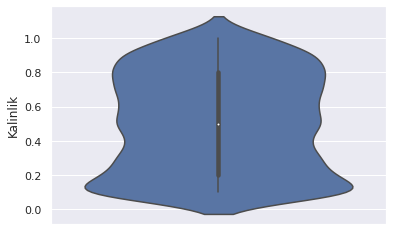

In [109]:
sns.violinplot(y = "Kalinlik",data = df)

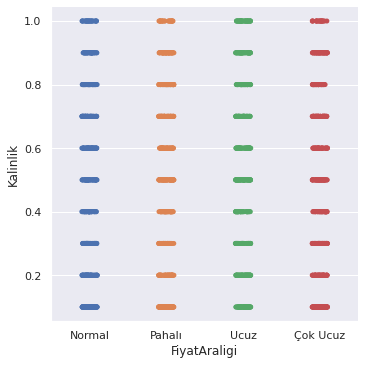

In [110]:
sns.catplot(x = "FiyatAraligi" , y = "Kalinlik" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='Kalinlik'>

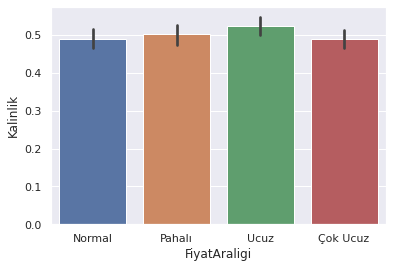

In [111]:
sns.barplot(x = "FiyatAraligi" , y = "Kalinlik" ,data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Agirlik', ylabel='Density'>

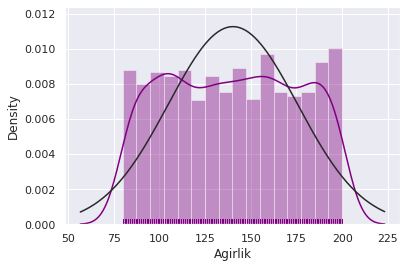

In [112]:
sns.distplot(df["Agirlik"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='Agirlik'>

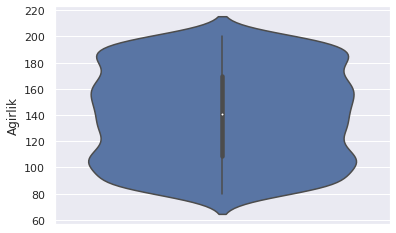

In [113]:
sns.violinplot(y = "Agirlik",data = df)

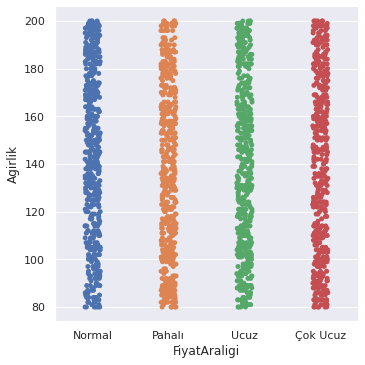

In [114]:
sns.catplot(x = "FiyatAraligi" , y = "Agirlik" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='Agirlik'>

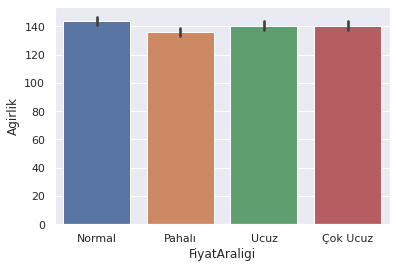

In [115]:
sns.barplot(x = "FiyatAraligi" , y = "Agirlik" ,data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CekirdekSayisi', ylabel='Density'>

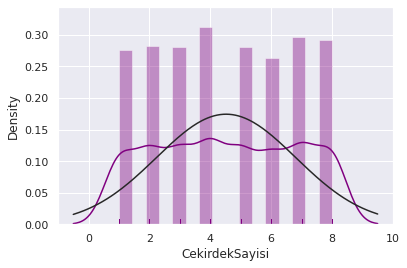

In [116]:
sns.distplot(df["CekirdekSayisi"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='CekirdekSayisi'>

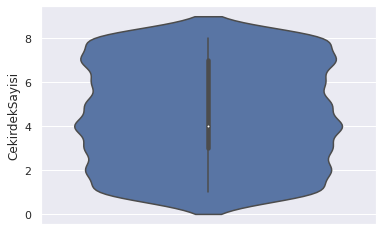

In [117]:
sns.violinplot(y = "CekirdekSayisi",data = df)

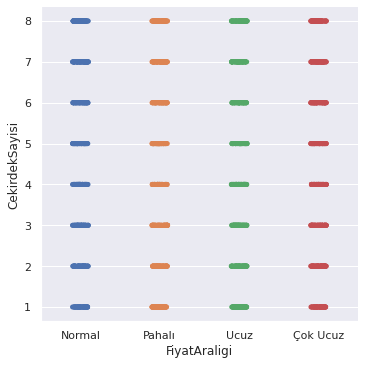

In [118]:
sns.catplot(x = "FiyatAraligi" , y = "CekirdekSayisi" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='CekirdekSayisi'>

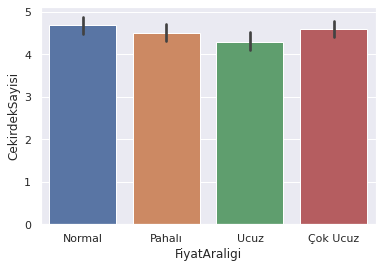

In [119]:
sns.barplot(x = "FiyatAraligi" , y = "CekirdekSayisi" ,data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ArkaKameraMP', ylabel='Density'>

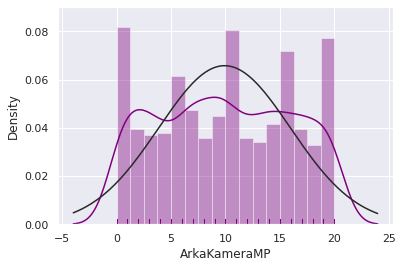

In [120]:
sns.distplot(df["ArkaKameraMP"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='ArkaKameraMP'>

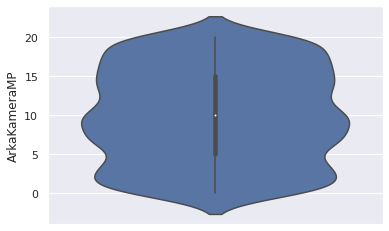

In [121]:
sns.violinplot(y = "ArkaKameraMP",data = df)

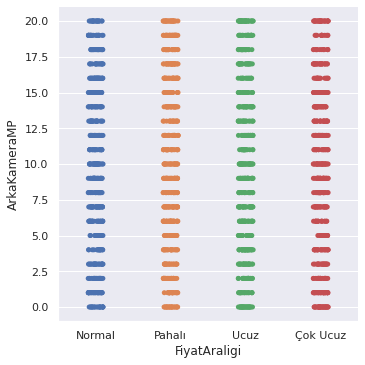

In [122]:
sns.catplot(x = "FiyatAraligi" , y = "ArkaKameraMP" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='ArkaKameraMP'>

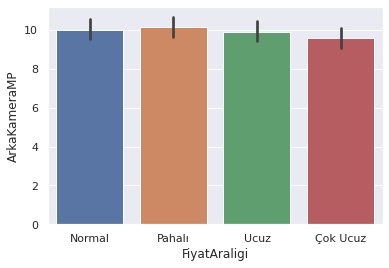

In [123]:
sns.barplot(x = "FiyatAraligi" , y = "ArkaKameraMP" ,data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CozunurlukYükseklik', ylabel='Density'>

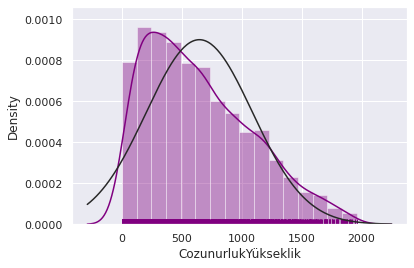

In [124]:
sns.distplot(df["CozunurlukYükseklik"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='CozunurlukYükseklik'>

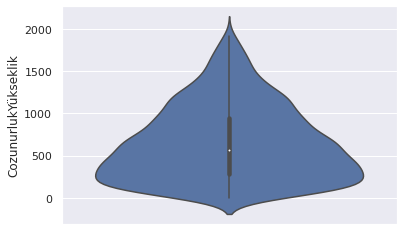

In [125]:
sns.violinplot(y = "CozunurlukYükseklik",data = df)

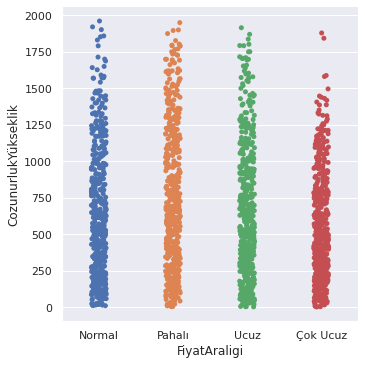

In [126]:
sns.catplot(x = "FiyatAraligi" , y = "CozunurlukYükseklik" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='CozunurlukYükseklik'>

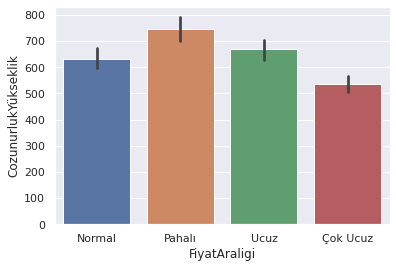

In [127]:
sns.barplot(x = "FiyatAraligi" , y = "CozunurlukYükseklik" ,data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CozunurlukGenislik', ylabel='Density'>

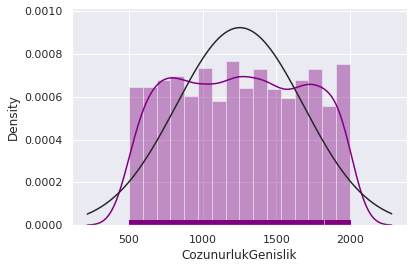

In [128]:
sns.distplot(df["CozunurlukGenislik"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='CozunurlukGenislik'>

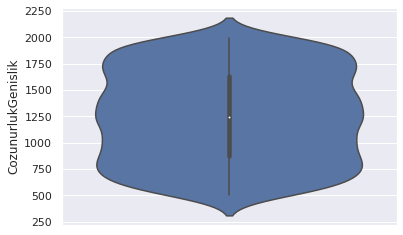

In [129]:
sns.violinplot(y = "CozunurlukGenislik",data = df)

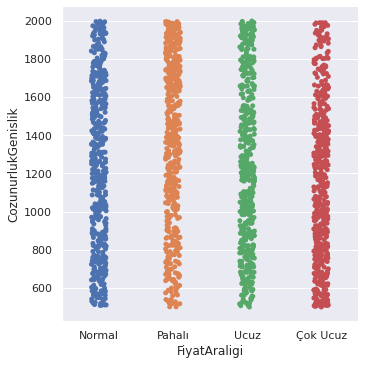

In [130]:
sns.catplot(x = "FiyatAraligi" , y = "CozunurlukGenislik" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='CozunurlukGenislik'>

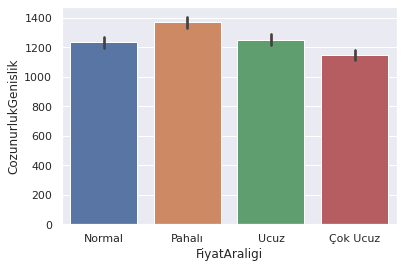

In [131]:
sns.barplot(x = "FiyatAraligi" , y = "CozunurlukGenislik" ,data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RAM', ylabel='Density'>

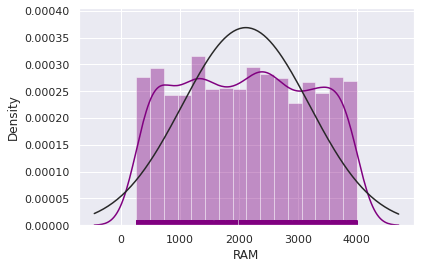

In [132]:
sns.distplot(df["RAM"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='RAM'>

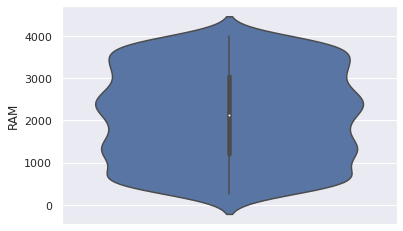

In [133]:
sns.violinplot(y = "RAM",data = df)

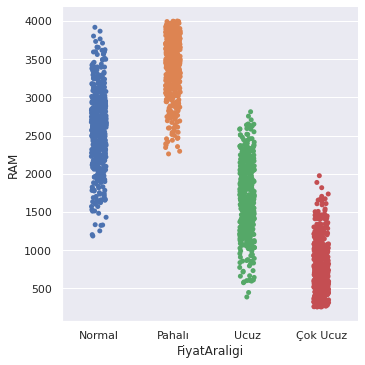

In [134]:
sns.catplot(x = "FiyatAraligi" , y = "RAM" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='RAM'>

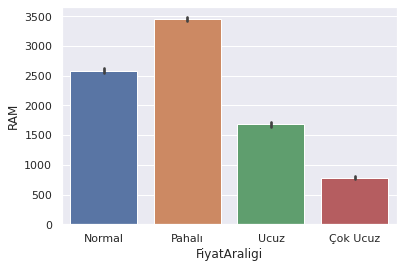

In [135]:
sns.barplot(x = "FiyatAraligi" , y = "RAM" ,data = df)

Bu grafiktende anlaşılacağı gibi ram in fiyat aralığında büyük bir önem arz ettiğini görüyoruz.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BataryaOmru', ylabel='Density'>

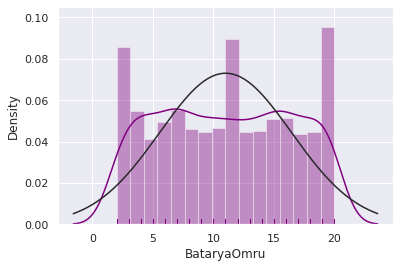

In [136]:
sns.distplot(df["BataryaOmru"],bins=16,color ="purple",fit=norm,rug = True)

<AxesSubplot:ylabel='BataryaOmru'>

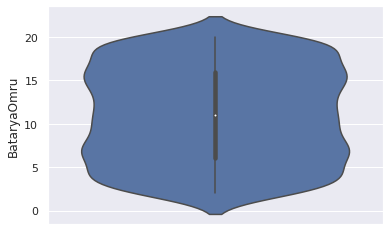

In [137]:
sns.violinplot(y = "BataryaOmru",data = df)

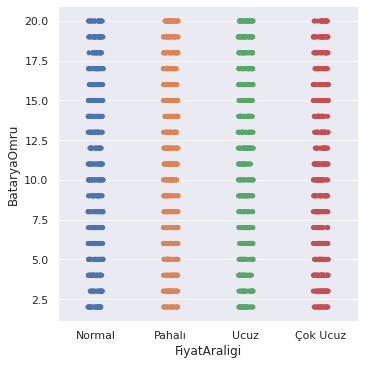

In [138]:
sns.catplot(x = "FiyatAraligi" , y = "BataryaOmru" ,data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='BataryaOmru'>

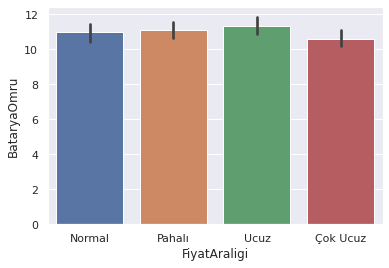

In [139]:
sns.barplot(x = "FiyatAraligi" , y = "BataryaOmru" ,data = df)

# EKSİK VERİLERLE İLGİLİ ÇALIŞMA

<AxesSubplot:>

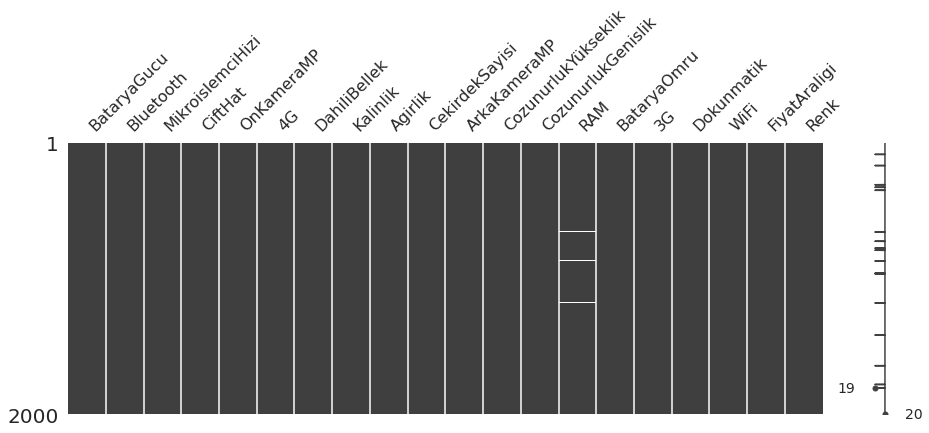

In [140]:
missingno.matrix(df,figsize=(15,5))

   Yukarıda ki grafiğin boyutunu arttırtıkça verilerden nan olanların yeri daha net gözükecektir.

<AxesSubplot:>

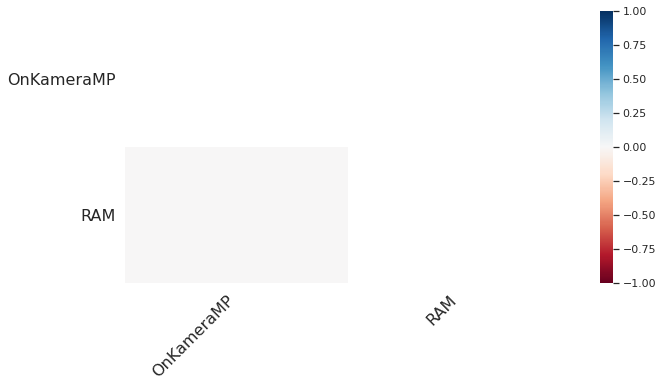

In [141]:
missingno.heatmap(df,figsize=(10,5))

<AxesSubplot:>

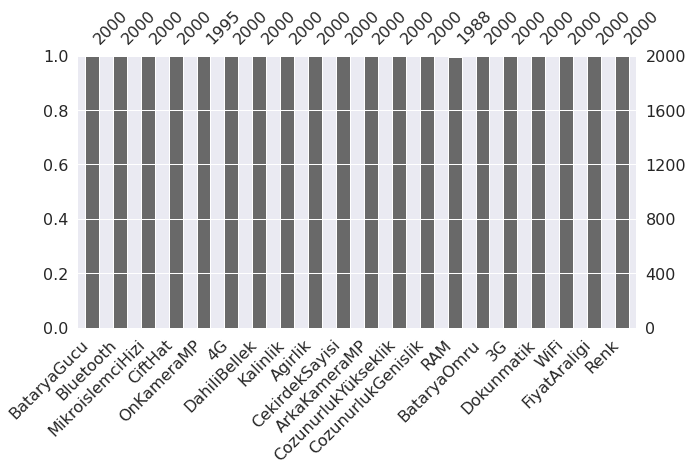

In [142]:
missingno.bar(df,figsize=(10,5))

<AxesSubplot:>

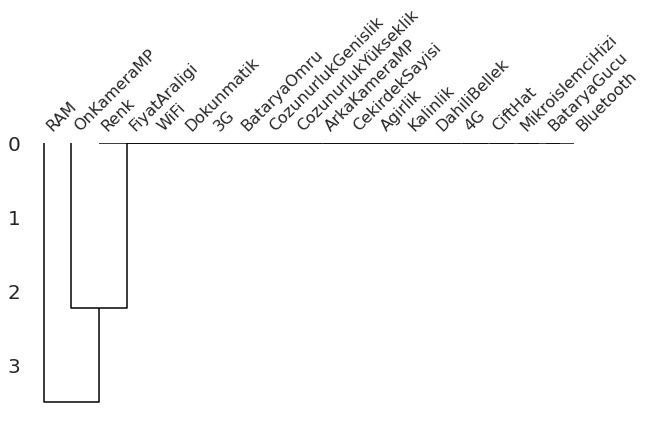

In [143]:
missingno.dendrogram(df,figsize=(10,5))

In [144]:
def eksik_deger_tablosu(df): 
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son

In [145]:
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
BataryaGucu,0,0.00
Bluetooth,0,0.00
MikroislemciHizi,0,0.00
CiftHat,0,0.00
OnKameraMP,5,0.25
4G,0,0.00
DahiliBellek,0,0.00
Kalinlik,0,0.00
Agirlik,0,0.00
CekirdekSayisi,0,0.00


Öncelikle veri setimizin nan olmayan kısmını çekiyoruz

In [146]:
df1 = df.dropna()

Daha sonrasında bunu asıl veri setimizin içinden ayırıyoruz ve bize içinde nan geçen satırları döndürmüş oluyor

In [147]:
df_NanDegiskenler=df.drop(df1.index,axis = 0)
df_NanDegiskenler

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı,Gri
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı,Beyaz
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı,Turuncu
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı,Beyaz
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı,Siyah
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı,Turkuaz
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı,Turuncu


Bizim veri setimizde toplamda 17 None değeri olduğunu biliyoruz bunların 12 tanesi Ram e ait 5 i ise OnKameraMp ye ait.Önceki verilerden de çkarımda bulunarak ram in fiyat değişkeni üzerinde belileyici bir özelliğinin olduğunu biliyoruz bundan dolayıda fiyat aralıklarına göre ram in ortalamalarını boş değerlere geçirebiliriz hem bu sayede bu ortalamayı da bozmamış oluruz.

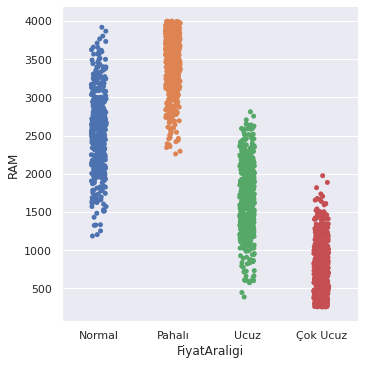

In [148]:
sns.catplot(x = "FiyatAraligi" , y = "RAM" ,data = df)

In [149]:
df.groupby(["FiyatAraligi"]).describe()["RAM"]

,count,mean,std,min,25%,50%,75%,max
FiyatAraligi,,,,,,,,
Normal,500.0,2582.81600,496.211735,1185.0,2292.75,2577.0,2927.00,3916.0
Pahalı,488.0,3449.35041,390.975480,2259.0,3207.50,3504.5,3764.75,3998.0
Ucuz,500.0,1679.49000,465.850159,387.0,1354.00,1686.5,2033.75,2811.0
Çok Ucuz,500.0,785.31400,362.755397,256.0,488.75,719.5,1037.00,1974.0


Şimdi yapmamız gereken şey ram değerlerinden None olanların Fiyat aralığına bakmak

In [150]:
df[df["RAM"].isnull()]["FiyatAraligi"].value_counts()

Pahalı    12
Name: FiyatAraligi, dtype: int64

12 verinin 12 sininde pahalı grubunda olduğunu görmüş olduk şimdi bu eksik değerlere pahalı grubunda ki ram ortalamasını yazdıracağız.

In [151]:
Ramnullindex = df[df['RAM'].isnull()].index

In [152]:
ortalama = df.groupby("FiyatAraligi")[["RAM"]].mean()
ortalama

,RAM
FiyatAraligi,
Normal,2582.81600
Pahalı,3449.35041
Ucuz,1679.49000
Çok Ucuz,785.31400


In [153]:
df.loc[Ramnullindex, "RAM"] = 3449

In [154]:
df.isnull().sum()

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             5
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

In [155]:
df1 = df.dropna()

In [156]:
df_NanDegiskenler=df.drop(df1.index,axis = 0)
df_NanDegiskenler

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1416,1617,Var,2.4,Yok,NaN,Var,36,0.8,85,1,9,743,1426,296.0,7,Var,Yok,Yok,Çok Ucuz,Sarı
1641,763,Yok,1.7,Var,NaN,Var,2,0.5,92,8,14,1028,1186,1050.0,8,Var,Var,Yok,Çok Ucuz,Siyah


Ram kısımlarını doldurmuş olduk şimdi geriye On kamera için bilgileri doldurmak kaldı.

In [157]:
df[df["OnKameraMP"].isnull()]["FiyatAraligi"].value_counts()

Çok Ucuz    5
Name: FiyatAraligi, dtype: int64

Daha öncesinden On Kamera da eksik girilen verilerin Çok Ucuz da olduğunu biliyorduk tekrardan kontrol etmiş olduk.

In [158]:
Ramnullindex = df[df['OnKameraMP'].isnull()].index

In [159]:
ortalama = df.groupby("FiyatAraligi")[["OnKameraMP"]].mean()
ortalama

,OnKameraMP
FiyatAraligi,
Normal,4.498000
Pahalı,4.316000
Ucuz,4.340000
Çok Ucuz,4.092929


In [160]:
df.loc[Ramnullindex, "OnKameraMP"] = 4

OnKameranın bütün değerlerinin int e deger olduğunu bildiğimiz için ortalamayıda en yakın tam sayıya yuvarlayarak yazdırdık.

In [161]:
df.isnull().sum()

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

Görüldüğü üzere artık verimizde hiçbir none değeri yok.Daha öncesinde ürettiğim bir tez vardı 0 değerleri veri setinde none değişkeni olduğu için belkide yok anlamına geliyordur ama Cozunurluk Yükseklikte 0 değeri yokluk anlamına gelmiyordu çünkü CozunurlukGenislik degerleri yazılıydı. Demek ki burdan çıkaracağımız sonuc Atlanan değerler için de yerine 0 yazılmış olabilir şimdi bunu ön ve arka kamera için test edeceğiz.

In [162]:
df[(df["OnKameraMP"] != 0)&(df["ArkaKameraMP"] == 0)]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
792,504,Yok,2.8,Var,4.0,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah


In [163]:
df[(df["OnKameraMP"] == 4)&(df["FiyatAraligi"] == "Çok Ucuz")&(df["4G"] == "Yok")&(df["CekirdekSayisi"] == 3)]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
792,504,Yok,2.8,Var,4.0,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1176,514,Var,0.7,Yok,4.0,Yok,57,0.1,186,3,7,168,1320,687.0,20,Var,Var,Var,Çok Ucuz,Turkuaz
1606,816,Var,0.5,Yok,4.0,Yok,14,0.9,198,3,13,149,558,1018.0,15,Var,Yok,Yok,Çok Ucuz,Pembe


Daha önceki grafiklerden hatırladığımız üzere ön kameranın gelişmesiyle arka kamera hiçbir zaman ön kamera için kötü durmamıştı.Bunla birlikte yukardaki çoğu bilginin uyuştuğunu uyuşmayan bilgilerin fiyat aralığında fazla bir önem taşımadığını biliyoruz son 2 gözleminin ortalamasını alıp arkakameramp ye yazdırabiliriz.

In [164]:
df.loc[792,"ArkaKameraMP"] = 10

In [165]:
df[(df["OnKameraMP"]>df["ArkaKameraMP"])]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
726,1296,Yok,0.9,Var,4.0,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı


Onkamera hiçbir zaman arka kameradan daha gelişmiş olmadığı için OnKamerayı da ekleme kısmını biz yaptığımız için tekrardan karşılaştırma yapıp yeni deger ekleyeceğiz.

In [166]:
df[(df["FiyatAraligi"] == "Çok Ucuz")&(df["4G"] == "Var")&(df["CekirdekSayisi"] == 5)&(df["ArkaKameraMP"] == 3)]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
726,1296,Yok,0.9,Var,4.0,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
1447,1558,Var,2.5,Yok,2.0,Var,32,0.1,114,5,3,322,1385,878.0,17,Var,Var,Var,Çok Ucuz,Gri


1447. satırdaki gözlemin 726.satırdaki gözlemden biraz daha gelişmiş olduğunu görüyoruz bundan dolayı on kameranın da aynı şekilde daha fazla geliştiğini düşünerek 726. gözlemin on kamerasının 2 den küçük bir degere sahip olarak göreceğiz.

In [167]:
df.loc[726,"OnKameraMP"] = 1

In [168]:
df[(df["OnKameraMP"] == 0)&(df["ArkaKameraMP"] != 0)]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
5,1162,Yok,1.0,Yok,0.0,Yok,50,0.5,104,4,10,332,866,1404.0,15,Var,Var,Var,Ucuz,Beyaz
11,1830,Yok,0.5,Yok,0.0,Yok,7,0.9,191,6,12,460,1583,2334.0,14,Yok,Var,Yok,Normal,Mavi
31,1777,Yok,2.2,Var,0.0,Yok,15,0.2,100,4,7,553,874,1552.0,10,Var,Var,Yok,Ucuz,Mor
36,545,Yok,0.5,Yok,0.0,Var,11,0.3,131,3,1,381,1452,616.0,19,Var,Var,Var,Çok Ucuz,Siyah
40,1802,Yok,2.7,Var,0.0,Var,10,0.6,101,7,9,253,590,696.0,3,Var,Var,Yok,Çok Ucuz,Mor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,729,Var,2.0,Yok,0.0,Yok,14,0.6,135,6,2,563,1055,3397.0,17,Var,Yok,Var,Normal,Kahverengi
1961,742,Var,2.3,Yok,0.0,Yok,21,0.7,104,8,1,875,925,331.0,7,Var,Yok,Yok,Çok Ucuz,Turuncu
1967,768,Yok,0.5,Var,0.0,Yok,19,0.9,159,2,1,637,991,1145.0,7,Yok,Yok,Var,Çok Ucuz,Kahverengi
1970,1965,Var,2.6,Var,0.0,Yok,39,0.2,187,4,3,915,1965,2032.0,16,Var,Var,Var,Normal,Turuncu


Veri setini incelediğimizde şunu anlıyoruz bu veri setinde ön kameranın ve arka kameranın çok iyi olması fiyat aralığını fazla etkileyen bir şey değil fiyat aralığını asıl etkileyenin ram olduğunu gördük şimdi biz on kamerada sıfır olan degerlerin boş geçilmesi ile sıfır girilmiştir düşünüp herhangi bir değer girmeye kalksak ilerdeki aşamalarda yanlış sonuçlar verebilir bundan dolayı on kameradaki degerleri ellemeyeceğiz.

# Kategorik değişkenleri sayısallaştırma

In [169]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [170]:
label_encoder = preprocessing.LabelEncoder()

In [171]:
df['Bluetooth'] = label_encoder.fit_transform(df['Bluetooth'])
df.head() #Bluetooth yok:1  var:0

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [172]:
df['CiftHat'] = label_encoder.fit_transform(df['CiftHat'])
df.head() #CiftHat yok:1  var:0

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [173]:
df['4G'] = label_encoder.fit_transform(df['4G'])
df.head() #4G yok:1 var:0

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [174]:
df['3G'] = label_encoder.fit_transform(df['3G'])
df.head() #3G var:0  yok:1

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,Var,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,Yok,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,Var,Var,Normal,Beyaz


In [175]:
df['Dokunmatik'] = label_encoder.fit_transform(df['Dokunmatik'])
df.head() #Dokunmatik yok:1 var:0

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,Var,Normal,Beyaz


In [176]:
df['WiFi'] = label_encoder.fit_transform(df['WiFi'])
df.head() #WiFi yok:1  var:0

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0,Normal,Beyaz


In [177]:
df['Renk'] = pd.Categorical(df['Renk'])
dfDummies = pd.get_dummies(df['Renk'], prefix = 'Renk')
dfDummies.head(3)

,Renk_Beyaz,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0


In [178]:
df = pd.concat([df, dfDummies], axis=1)

In [179]:
df.drop('Renk',axis=1, inplace=True)
df.drop('Renk_Siyah',axis=1, inplace=True)
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,...,0,0,0,0,0,1,0,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,...,0,0,0,0,1,0,0,0,0,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0


şimdi kategorik değişkenleri sayısallaştırdığımız için grafiklerle yorumlayıp fiyat aralığına etkisi var mı yok mu onu yorumlayacağız.

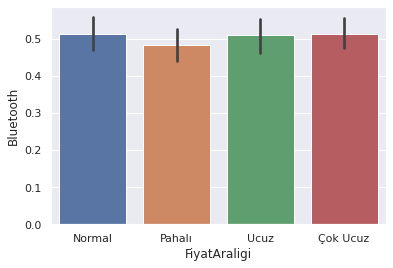

In [180]:
sns.barplot(y="Bluetooth", x="FiyatAraligi", data = df);

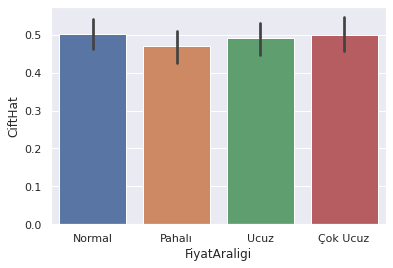

In [181]:
sns.barplot(y="CiftHat", x="FiyatAraligi", data = df);

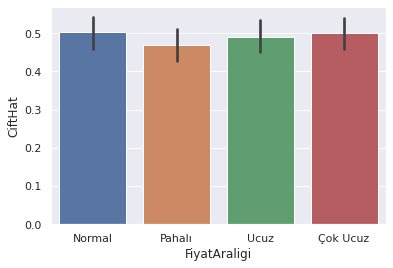

In [182]:
sns.barplot(y="CiftHat", x="FiyatAraligi", data = df);

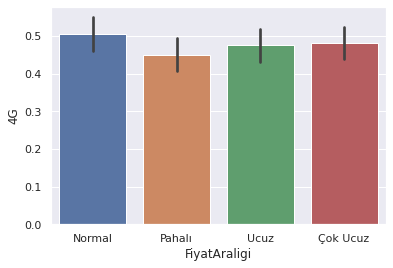

In [183]:
sns.barplot(y="4G", x="FiyatAraligi", data = df);

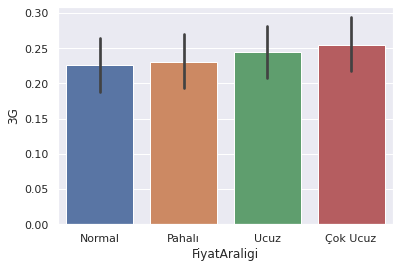

In [184]:
sns.barplot(y="3G", x="FiyatAraligi", data = df);

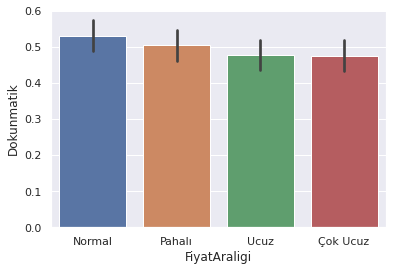

In [185]:
sns.barplot(y="Dokunmatik", x="FiyatAraligi", data = df);

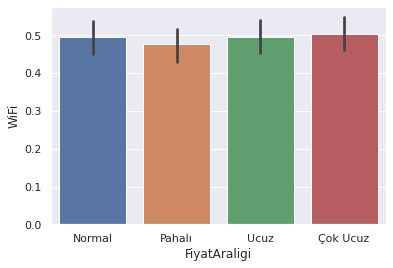

In [186]:
sns.barplot(y="WiFi", x="FiyatAraligi", data = df);

In [187]:
df['FiyatAraligi'] = label_encoder.fit_transform(df['FiyatAraligi'])
df["FiyatAraligi"].head(4) #FiyatAraligi Normal:0   Pahalı:1  Ucuz:2  Çok Ucuz:3

0    0
1    1
2    2
3    1
Name: FiyatAraligi, dtype: int64

In [188]:
j=0
for i in df["FiyatAraligi"]:
    if df.loc[j,"FiyatAraligi"] == 3:
        df.loc[j,"FiyatAraligi"] = 0
    elif df.loc[j,"FiyatAraligi"] == 2:
        df.loc[j,"FiyatAraligi"] = 1
    elif df.loc[j,"FiyatAraligi"] == 0:
        df.loc[j,"FiyatAraligi"] = 2
    elif df.loc[j,"FiyatAraligi"] == 1:
        df.loc[j,"FiyatAraligi"] = 3
    j+=1    

Burda sayısallaştırıldıktan sonra sıralı bir şekilde yazılmasını sağlıyoruz.

# REGRESYON

* Regresyon analizinde, iki ya da daha çok değişkenin yer aldığı istatiksel modellerde, genellikle neden-sonuç ilişkileri araştırılır. Yani değişkenlerden biri ya da birkaçının, diğer bir ya da birkaç değişkeni ne ölçüde etkilediği incelenir. Eğer değişkenler arasında ilişki varsa, ilişkinin derecesi matematiksel bir fonksiyon olarak ortaya konur. Bu fonksiyona regresyon fonksiyonu denir.

* Regresyon modeli iki ya da daha fazla değişken arasındaki ilişkinin fonksiyonel şeklini göstermekle kalmaz, değişkenlerden birinin değeri bilindiğinde diğeri hakkında tahmin yapılmasını da sağlar.

* İki ya da daha çok değişken arasındaki ilişkinin matematiksel bağıntısı “Regresyon Analizi” ile ilişkinin yönü ve derecesi ise “Korelasyon Analizi” ile incelenir.

In [189]:
X = df.drop("FiyatAraligi",axis=1)
Y = df["FiyatAraligi"]

In [190]:
lm = LinearRegression()
model = lm.fit(X,Y)

In [191]:
model.coef_ #Burada Modelimizin katsayılarına bakıyoruz

array([ 5.05543359e-04, -8.80238598e-04, -1.22695655e-02,  2.32173833e-02,
        1.12283895e-03,  1.40819930e-03,  8.35711442e-04, -9.44099802e-03,
       -8.24286835e-04,  1.55232568e-03,  1.47909358e-04,  2.77400860e-04,
        2.77640479e-04,  9.47815486e-04,  4.22511232e-05, -2.47181075e-02,
        6.87926512e-03,  1.73201956e-02, -1.72235005e-02, -3.25792084e-02,
       -6.65576769e-02, -7.10892194e-02, -6.18441659e-02, -5.00468011e-02,
       -3.20977731e-02, -3.17006887e-02, -4.49136801e-03, -3.57869259e-02,
        1.33501885e-02])

In [192]:
model.intercept_ #Burada Modelimizin hata payına bakıyoruz.

-1.553340633728605

In [193]:
model.score(X,Y)

0.9194531542899822

In [194]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)

In [195]:
X_train

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
581,1454,0,1.6,1,6.0,0,21,0.2,160,4,...,0,0,0,0,0,1,0,0,0,0
76,1254,1,1.2,0,2.0,1,50,0.7,108,5,...,0,0,0,0,0,0,0,1,0,0
1916,1762,1,0.6,1,3.0,0,26,0.1,83,6,...,0,0,0,0,1,0,0,0,0,0
1414,1876,1,1.3,0,9.0,0,64,1.0,98,3,...,0,0,0,0,0,0,0,0,0,1
780,1426,1,1.6,1,4.0,0,12,0.7,174,5,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,605,1,1.0,1,8.0,0,9,0.1,142,3,...,0,0,1,0,0,0,0,0,0,0
1294,1149,0,2.2,1,4.0,1,30,0.2,106,6,...,0,1,0,0,0,0,0,0,0,0
860,534,1,0.5,0,4.0,1,2,0.2,85,5,...,1,0,0,0,0,0,0,0,0,0
1459,1720,1,1.6,1,18.0,0,2,0.8,188,5,...,0,0,0,0,0,0,0,1,0,0


In [196]:
X_test

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
1860,1433,0,2.3,1,2.0,0,5,0.1,129,5,...,0,0,0,0,0,0,0,0,0,0
353,1174,0,0.9,1,7.0,1,30,1.0,147,4,...,0,0,0,0,0,0,0,0,0,0
1333,999,1,2.6,0,11.0,0,56,1.0,165,4,...,0,0,0,0,0,1,0,0,0,0
905,972,0,0.5,0,5.0,1,13,0.4,193,5,...,0,0,0,0,0,0,0,1,0,0
1289,1811,0,2.5,1,4.0,0,5,0.6,98,4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,768,0,0.9,1,16.0,0,56,0.1,113,1,...,0,0,0,0,0,0,0,0,0,0
45,1067,0,2.4,0,3.0,0,40,0.6,122,8,...,0,0,0,0,0,0,0,0,0,0
1719,1062,1,0.5,1,3.0,0,39,0.9,124,4,...,0,0,0,0,1,0,0,0,0,0
1831,1187,0,2.2,1,0.0,0,46,0.4,145,2,...,0,0,0,0,0,0,0,0,0,0


In [197]:
Y_train

581     0
76      3
1916    2
1414    3
780     1
       ..
1130    0
1294    3
860     2
1459    2
1126    1
Name: FiyatAraligi, Length: 1700, dtype: int64

In [198]:
Y_test

1860    1
353     0
1333    2
905     1
1289    2
       ..
316     0
45      0
1719    0
1831    3
427     1
Name: FiyatAraligi, Length: 300, dtype: int64

In [199]:
lm2 = LinearRegression()
model2 = lm2.fit(X_train, Y_train)

In [200]:
model2.score(X_train, Y_train)

0.9190391471960835

In [201]:
y_pred = model2.predict(X_test) # X_test'i vererek cevapları yani y_test'i tahmin etmesini isteyelim.
y_pred

array([ 1.43106653,  0.29619647,  2.27887855,  1.21396014,  2.10728458,
        2.13698489,  2.62738722,  0.81869654,  2.12815857,  1.94193314,
        1.15801991,  2.01413874,  1.63698293, -0.15639377,  0.4405337 ,
        0.17694655,  0.4823496 ,  0.91467953, -0.08855946,  0.74020846,
        1.2615084 ,  1.06792637,  0.68654758, -0.08764305, -0.31439433,
        1.65659507,  0.42435211,  1.74816695, -0.44731568,  0.41098753,
        0.61215396,  0.33129199,  2.0063022 ,  1.81298   ,  1.27898435,
        1.40153088,  2.79455468,  2.32969587, -0.21037829,  0.19546622,
        2.07678322,  2.11326217,  0.94185109,  3.39039643,  0.26404333,
       -0.13503293,  0.26004898,  0.19497443,  0.01465865,  2.59348519,
        2.89951177,  3.2185763 ,  2.36328365,  2.9257739 ,  0.06699972,
        0.51488822, -0.07462249,  1.23090574,  1.80130691,  2.39903123,
        0.37149883,  1.07695299,  1.70080935,  1.8622333 ,  2.84129113,
       -0.35957372,  1.42092734,  0.25061229,  0.77559444,  1.80

In [202]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train, model2.predict(X_train)) #MSE DEĞERİ

0.10042294536562861

In [203]:
mean_squared_error(Y_test, model2.predict(X_test)) #MSE DEĞERİ

0.10467072338250163

In [204]:
r2_score(Y_train, model2.predict(X_train)) # R_Squared metriğini eğitim üzerinde inceleyelim.

0.9190391471960835

R-kare, lineer regresyon modeli için bağımsız değişkenlerimiz (X) tarafından açıklanan bağımlı değişkenimizdeki (Y) varyasyon oranını ölçer.

In [205]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict

In [206]:
cross_val_score(model2, X_train, Y_train, cv = 10, scoring = "r2")

array([0.9047084 , 0.91298073, 0.90885947, 0.91887378, 0.92232557,
       0.90750011, 0.91862218, 0.91407119, 0.9315148 , 0.9123176 ])

In [207]:
cross_val_score(model2, X_train, Y_train, cv = 10, scoring = "r2").mean()

0.915177384568706

Korelasyon Katsayısı ve R Kare Farkları
* 1- Korelasyon katsayısı, iki değişken arasındaki doğrusal ilişkiyi temsil etmek için kullanılır. Regresyon katsayısı ise bir değişkeni başka bir değişken temelinde tahmin etmek için kullanılır. 
* 2- Korelasyon değişkenler arasındaki ilişkinin gücünü gösterir. Regresyon katsayısı ise bağımsız değişkendeki birim değişikliğinin bağımlı değişken üzerindeki etkisini gösterir

model.score() için eğitim verisini verdiğimizde 91.90391471960835 başarı elde ediyorduk, halbuki 10 farklı parça üzerinde aynı işlemi yaptığımızda ortalama 91.5177384568706'a düştü. Çünkü böylelikle test edilmeyen hiçbir gözlem kalmadı. Tüm gözlemler test ve train olmak üzere yer değiştirebilme şansı buldu.

# Naive Bayes Algoritması

* Naive Bayes sınıflandırıcısı, sınıflandırma görevi için kullanılan olasılıklı bir makine öğrenme modelidir. Sınıflandırıcının noktası, Bayes teoremine dayanır.
* lazy ( tembel ) bir öğrenme algoritmasıdır aynı zamanda dengesiz veri kümelerinde de çalışabilir. Algoritmanın çalışma şekli bir eleman için her durumun olasılığını hesaplar ve olasılık değeri en yüksek olana göre sınıflandırır. Az bir eğitim verisiyle çok başarılı işler çıkartabilir.

In [208]:
j=0
for i in df["FiyatAraligi"]:
    if df.loc[j,"FiyatAraligi"] == 0:
        df.loc[j,"FiyatAraligi"] = "Çok Ucuz"
    elif df.loc[j,"FiyatAraligi"] == 1:
        df.loc[j,"FiyatAraligi"] = "Ucuz"
    elif df.loc[j,"FiyatAraligi"] == 2:
        df.loc[j,"FiyatAraligi"] = "Normal"
    elif df.loc[j,"FiyatAraligi"] == 3:
        df.loc[j,"FiyatAraligi"] = "Pahali"
    j+=1

In [209]:
y = df['FiyatAraligi']
x = df.drop(['FiyatAraligi'], axis=1)

In [210]:
x

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,...,0,0,0,0,0,1,0,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,...,0,0,0,0,1,0,0,0,0,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,1,2.9,0,3.0,0,7,0.8,147,2,...,0,0,0,0,0,0,0,0,0,0
1996,1654,1,1.8,1,1.0,1,11,0.3,146,7,...,0,0,0,0,0,0,1,0,0,0
1997,742,1,2.2,0,4.0,1,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,1,2.2,0,4.0,1,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0


In [211]:
y

0         Normal
1         Pahali
2           Ucuz
3         Pahali
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahali
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 2000, dtype: object

In [212]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.15, 
                                                    random_state = 42)

In [213]:
x_train

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
581,1454,0,1.6,1,6.0,0,21,0.2,160,4,...,0,0,0,0,0,1,0,0,0,0
76,1254,1,1.2,0,2.0,1,50,0.7,108,5,...,0,0,0,0,0,0,0,1,0,0
1916,1762,1,0.6,1,3.0,0,26,0.1,83,6,...,0,0,0,0,1,0,0,0,0,0
1414,1876,1,1.3,0,9.0,0,64,1.0,98,3,...,0,0,0,0,0,0,0,0,0,1
780,1426,1,1.6,1,4.0,0,12,0.7,174,5,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,605,1,1.0,1,8.0,0,9,0.1,142,3,...,0,0,1,0,0,0,0,0,0,0
1294,1149,0,2.2,1,4.0,1,30,0.2,106,6,...,0,1,0,0,0,0,0,0,0,0
860,534,1,0.5,0,4.0,1,2,0.2,85,5,...,1,0,0,0,0,0,0,0,0,0
1459,1720,1,1.6,1,18.0,0,2,0.8,188,5,...,0,0,0,0,0,0,0,1,0,0


In [214]:
y_train

581     Çok Ucuz
76        Pahali
1916      Normal
1414      Pahali
780         Ucuz
          ...   
1130    Çok Ucuz
1294      Pahali
860       Normal
1459      Normal
1126        Ucuz
Name: FiyatAraligi, Length: 1700, dtype: object

In [215]:
x_test

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
1860,1433,0,2.3,1,2.0,0,5,0.1,129,5,...,0,0,0,0,0,0,0,0,0,0
353,1174,0,0.9,1,7.0,1,30,1.0,147,4,...,0,0,0,0,0,0,0,0,0,0
1333,999,1,2.6,0,11.0,0,56,1.0,165,4,...,0,0,0,0,0,1,0,0,0,0
905,972,0,0.5,0,5.0,1,13,0.4,193,5,...,0,0,0,0,0,0,0,1,0,0
1289,1811,0,2.5,1,4.0,0,5,0.6,98,4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,768,0,0.9,1,16.0,0,56,0.1,113,1,...,0,0,0,0,0,0,0,0,0,0
45,1067,0,2.4,0,3.0,0,40,0.6,122,8,...,0,0,0,0,0,0,0,0,0,0
1719,1062,1,0.5,1,3.0,0,39,0.9,124,4,...,0,0,0,0,1,0,0,0,0,0
1831,1187,0,2.2,1,0.0,0,46,0.4,145,2,...,0,0,0,0,0,0,0,0,0,0


In [216]:
y_test

1860        Ucuz
353     Çok Ucuz
1333      Normal
905         Ucuz
1289      Normal
          ...   
316     Çok Ucuz
45      Çok Ucuz
1719    Çok Ucuz
1831      Pahali
427         Ucuz
Name: FiyatAraligi, Length: 300, dtype: object

In [217]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)

In [218]:
y_pred = nb_model.predict(x_test)
y_pred

array(['Normal', 'Çok Ucuz', 'Pahali', 'Ucuz', 'Normal', 'Normal',
       'Pahali', 'Ucuz', 'Pahali', 'Ucuz', 'Ucuz', 'Normal', 'Normal',
       'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz',
       'Ucuz', 'Ucuz', 'Ucuz', 'Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Normal',
       'Ucuz', 'Normal', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Ucuz', 'Normal',
       'Normal', 'Ucuz', 'Ucuz', 'Pahali', 'Pahali', 'Çok Ucuz',
       'Çok Ucuz', 'Ucuz', 'Pahali', 'Normal', 'Pahali', 'Çok Ucuz',
       'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Normal', 'Pahali',
       'Pahali', 'Pahali', 'Normal', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz',
       'Ucuz', 'Normal', 'Pahali', 'Çok Ucuz', 'Ucuz', 'Normal', 'Ucuz',
       'Pahali', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz', 'Ucuz', 'Normal', 'Ucuz',
       'Pahali', 'Çok Ucuz', 'Ucuz', 'Normal', 'Normal', 'Pahali',
       'Pahali', 'Ucuz', 'Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Pahali',
       'Normal', 'Ucuz', 'Pahali', 'Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz',


Accuracy, anlaşılması ve yorumlanması en basit ölçütlerden birisidir. Makine öğrenmesi sınıflandırma algoritmalarının testlerinde sıklıkla kullanılır. Accuracy skoru aşağıdaki gibi hesaplanır. Accuracy skoru 0 ve 1 arasında olup 1’e yaklaşan skorlarda model başarılı kabul edilir.

* Accuracy = (TP + TN) / (TP + FP + TN + FN)

In [219]:
accuracy_score(y_test, y_pred) 

0.7566666666666667

In [220]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[41 10 20  0]
 [16 54  1  0]
 [11  0 56  4]
 [ 0  0 11 76]]


In [221]:
cross_val_score(nb_model, x_test, y_test, cv = 10)

array([0.63333333, 0.6       , 0.73333333, 0.66666667, 0.66666667,
       0.5       , 0.53333333, 0.5       , 0.63333333, 0.7       ])

In [222]:
cross_val_score(nb_model, x_test, y_test, cv = 10).mean()

0.6166666666666667

In [223]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.60      0.58      0.59        71
      Pahali       0.84      0.76      0.80        71
        Ucuz       0.64      0.79      0.70        71
    Çok Ucuz       0.95      0.87      0.91        87

    accuracy                           0.76       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.77      0.76      0.76       300



In [224]:
PrecisionScore = precision_score(y_test, y_pred, average='weighted')
PrecisionScore #Kesinlik   Kesinlik (Precision) ise Positive olarak tahminlediğimiz değerlerin gerçekten kaç adedinin Positive olduğunu göstermektedir.

0.7684896390374331

In [225]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore #Duyarlılık Duyarlılık (Recall) ise Positive olarak tahmin etmemiz gereken işlemlerin ne kadarını Positive olarak tahmin ettiğimizi gösteren bir metriktir.

0.7566666666666667

In [226]:
F1Score = f1_score(y_test, y_pred, average = 'weighted')  
F1Score # F1 Score değeri bize Kesinlik (Precision) ve Duyarlılık (Recall) değerlerinin harmonik ortalamasını göstermektedir.

0.7596103314839937

Modelin eğitildiği gözlem sayısı çok az ve model için çiçek türünü tespit edebilecek anlamlı bir çok öznitelik var. Hangilerinin daha anlamlı olduğunu gözlemleyelim ve en anlamsız görünen özniteliği(skoru en düşük olan özniteliği) budayalım.

In [227]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func = f_classif, k = 'all')

In [228]:
fit = test.fit(x, y)

In [229]:
for indis, skor in enumerate(fit.scores_):
    print(X.columns[indis], " -> ", skor)

BataryaGucu  ->  31.59815753989697
Bluetooth  ->  0.47676770911738764
MikroislemciHizi  ->  0.49370780102890643
CiftHat  ->  0.4282392855760711
OnKameraMP  ->  0.7656831734880986
4G  ->  1.0595245262721884
DahiliBellek  ->  2.9229960794178416
Kalinlik  ->  1.5006824396689178
Agirlik  ->  3.5943181851549952
CekirdekSayisi  ->  2.6254151540861677
ArkaKameraMP  ->  0.7656901863039034
CozunurlukYükseklik  ->  19.847190582721918
CozunurlukGenislik  ->  22.620882490611052
RAM  ->  3545.3474377718053
BataryaOmru  ->  1.6288113087357383
3G  ->  0.45731974970570366
Dokunmatik  ->  1.2933022318768916
WiFi  ->  0.2849404695195694
Renk_Beyaz  ->  0.7985277644423141
Renk_Gri  ->  0.7424648216639064
Renk_Kahverengi  ->  1.8515556048444797
Renk_Kırmızı  ->  0.32874764864466033
Renk_Mavi  ->  0.8546411492461239
Renk_Mor  ->  0.5900785144514252
Renk_Pembe  ->  0.4845836368050502
Renk_Sarı  ->  0.2221109441940691
Renk_Turkuaz  ->  2.379774003890458
Renk_Turuncu  ->  0.5733834743549536
Renk_Yeşil  ->  2.

Renklerin çok etkilemediğini görüyoruz ilk baş renk kısımlarını çıkartalım

In [230]:
y = df['FiyatAraligi']
x = df.drop(['FiyatAraligi', 'Renk_Beyaz', 'Renk_Gri', 'Renk_Kahverengi','Renk_Kırmızı','Renk_Mavi','Renk_Mor','Renk_Pembe','Renk_Sarı','Renk_Turkuaz','Renk_Turuncu','Renk_Yeşil'], axis=1)

In [231]:
nb = GaussianNB() 
nb_model = nb.fit(x, y) 

In [232]:
y_pred = nb_model.predict(x)

In [233]:
accuracy_score(y, y_pred)

0.8155

değerimizin %81.55 e çıktığını gördük daha da arttırabilir miyiz ona bakalım.

In [234]:
karmasiklik_matrisi = confusion_matrix(y, y_pred)
print(karmasiklik_matrisi)

[[363  52  85   0]
 [ 52 447   1   0]
 [ 93   0 365  42]
 [  0   0  44 456]]


In [235]:
test = SelectKBest(score_func = f_classif, k = 'all')

In [236]:
fit = test.fit(x, y)

In [237]:
for indis, skor in enumerate(fit.scores_):
    print(X.columns[indis], " -> ", skor)

BataryaGucu  ->  31.59815753989697
Bluetooth  ->  0.47676770911738764
MikroislemciHizi  ->  0.49370780102890643
CiftHat  ->  0.4282392855760711
OnKameraMP  ->  0.7656831734880986
4G  ->  1.0595245262721884
DahiliBellek  ->  2.9229960794178416
Kalinlik  ->  1.5006824396689178
Agirlik  ->  3.5943181851549952
CekirdekSayisi  ->  2.6254151540861677
ArkaKameraMP  ->  0.7656901863039034
CozunurlukYükseklik  ->  19.847190582721918
CozunurlukGenislik  ->  22.620882490611052
RAM  ->  3545.3474377718053
BataryaOmru  ->  1.6288113087357383
3G  ->  0.45731974970570366
Dokunmatik  ->  1.2933022318768916
WiFi  ->  0.2849404695195694


In [238]:
y = df['FiyatAraligi']
x = df.drop(['FiyatAraligi', 'Renk_Beyaz', 'Renk_Gri', 'Renk_Kahverengi','Renk_Kırmızı','Renk_Mavi','Renk_Mor','Renk_Pembe','Renk_Sarı','Renk_Turkuaz','Renk_Turuncu','Renk_Yeşil','WiFi'], axis=1)

In [239]:
nb = GaussianNB() 
nb_model = nb.fit(x, y)

In [240]:
y_pred = nb_model.predict(x)

In [241]:
accuracy_score(y, y_pred)

0.8165

In [242]:
karmasiklik_matrisi = confusion_matrix(y, y_pred)
print(karmasiklik_matrisi)

[[363  52  85   0]
 [ 50 449   1   0]
 [ 93   0 365  42]
 [  0   0  44 456]]


değerimizin 0.0010 daha arttırabildik ama diğer değişkenlerimizin de eksilmesiyle sonuçlarımız iyiye gitmeyebilir.(DENENDİ)

# DecisionTree


* Gini safsızlığı, rastgele etiketlendiğinde veri kümesinin herhangi bir öğesinin yanlış etiketlenme sıklığını ölçer.

* Gini Dizininin minimum değeri 0'dır. Bu, düğüm saf olduğunda olur , bu , düğümdeki tüm içerilen öğelerin tek bir benzersiz sınıftan olduğu anlamına gelir. Bu nedenle, bu düğüm tekrar bölünmeyecektir. Böylece, daha az Gini İndeksi olan özellikler tarafından optimum bölünme seçilir. Ayrıca, iki sınıfın olasılığı aynı olduğunda maksimum değeri alır.

* Entropi, özelliklerin hedefle olan düzensizliğini gösteren bir bilgi ölçüsüdür. Gini İndeksine benzer şekilde, optimum bölünme, daha az entropiye sahip özellik tarafından seçilir. İki sınıfın olasılığı aynı olduğunda maksimum değerini alır ve entropinin minimum değeri 0 olduğunda bir düğüm saftır.


#### Gini vs Entropi
* Gini İndeksi [0, 0.5] aralığı içinde değerlere sahipken Entropi aralığı [0, 1]'dir.
* Hesaplamalı olarak, entropi logaritma kullandığından daha karmaşıktır ve sonuç olarak Gini Endeksinin hesaplanması daha hızlı olacaktır.

In [243]:
Y = df["FiyatAraligi"]
X = df.drop(["FiyatAraligi"], axis=1)

In [244]:
X

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,...,0,0,0,0,0,1,0,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,...,0,0,0,0,1,0,0,0,0,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,1,2.9,0,3.0,0,7,0.8,147,2,...,0,0,0,0,0,0,0,0,0,0
1996,1654,1,1.8,1,1.0,1,11,0.3,146,7,...,0,0,0,0,0,0,1,0,0,0
1997,742,1,2.2,0,4.0,1,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,1,2.2,0,4.0,1,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0


In [245]:
Y

0         Normal
1         Pahali
2           Ucuz
3         Pahali
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahali
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 2000, dtype: object

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.15,
                                                    random_state=42)

In [247]:
cart_grid = {"max_depth": range(1,20),
            "min_samples_split" : range(2,50)}

In [248]:
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)

In [249]:
cart_cv_model = cart_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 912 candidates, totalling 9120 fits


In [250]:
print("En iyi parametreler : " + str(cart_cv_model.best_params_))
print("En iyi skor : " + str(cart_cv_model.best_score_))

En iyi parametreler : {'max_depth': 9, 'min_samples_split': 3}
En iyi skor : 0.8517647058823531


In [251]:
cart = DecisionTreeClassifier(max_depth = 9, min_samples_split = 2)
cart_tuned = cart.fit(X_train, Y_train)

In [252]:
Y_pred = cart_tuned.predict(X_test)

In [253]:
accuracy_score(Y_test, Y_pred)

0.8366666666666667

In [254]:
karmasiklik_matrisi = confusion_matrix(Y_test, Y_pred)
print(karmasiklik_matrisi)

[[52 13  6  0]
 [ 6 65  0  0]
 [ 9  0 55  7]
 [ 0  0  8 79]]


In [255]:
cross_val_score(cart_tuned, X_test, Y_test, cv = 10)

array([0.73333333, 0.76666667, 0.86666667, 0.7       , 0.83333333,
       0.73333333, 0.96666667, 0.66666667, 0.66666667, 0.66666667])

In [256]:
cross_val_score(cart_tuned, X, Y, cv = 10).mean()

0.8355

In [257]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Normal       0.78      0.73      0.75        71
      Pahali       0.83      0.92      0.87        71
        Ucuz       0.80      0.77      0.79        71
    Çok Ucuz       0.92      0.91      0.91        87

    accuracy                           0.84       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.84      0.84       300



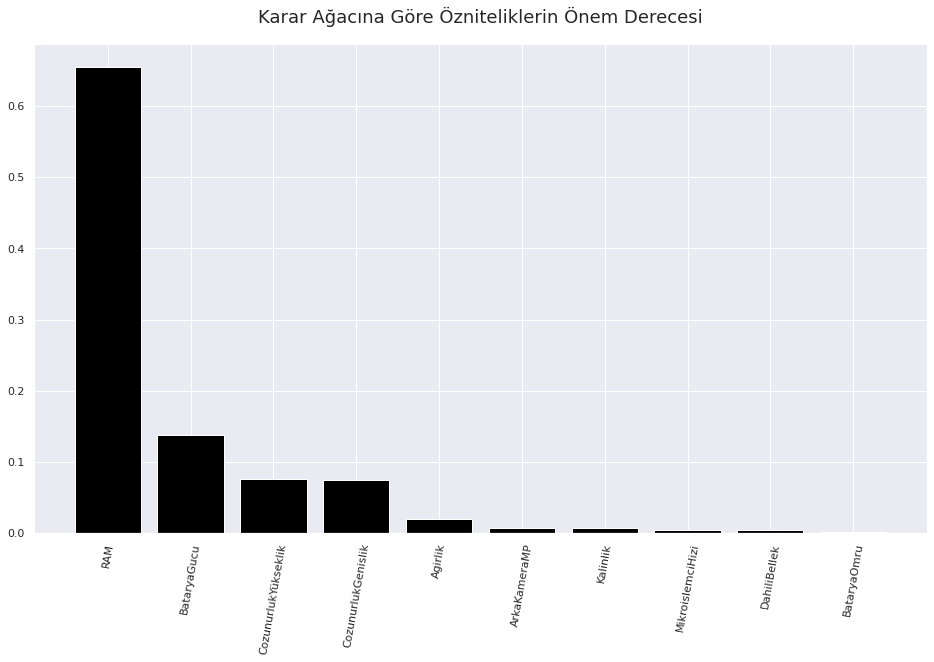

In [258]:
ranking = cart.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.figure(figsize = (16, 9))
plt.title("Karar Ağacına Göre Özniteliklerin Önem Derecesi", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="black", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

Ekip lideri DecisionTree algoritmasının varsayılan olarak (criterion = “gini”) parametre değerini kullandığını ancak bu problem için criterion parametresini (criterion = “entropy”) olacak şekilde değiştirdiklerinde başarının artacağı konusunda ekibi temin etmiştir. Deneyelim

In [259]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.15,
                                                    random_state=42)

In [260]:
cart_grid = {"max_depth": range(1,20),
            "min_samples_split" : range(2,50)}

In [261]:
cart = DecisionTreeClassifier(criterion="entropy")
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)

In [262]:
cart_cv_model = cart_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 912 candidates, totalling 9120 fits


In [263]:
print("En iyi parametreler : " + str(cart_cv_model.best_params_))
print("En iyi skor : " + str(cart_cv_model.best_score_))

En iyi parametreler : {'max_depth': 13, 'min_samples_split': 10}
En iyi skor : 0.8629411764705883


In [264]:
cart = DecisionTreeClassifier(max_depth = 17, min_samples_split = 9)
cart_tuned = cart.fit(X_train, Y_train)

In [265]:
Y_pred = cart_tuned.predict(X_test)

In [266]:
accuracy_score(Y_test, Y_pred)

0.8466666666666667

In [267]:
karmasiklik_matrisi = confusion_matrix(Y_test, Y_pred)
print(karmasiklik_matrisi)

[[54 13  4  0]
 [ 6 65  0  0]
 [10  0 56  5]
 [ 0  0  8 79]]


In [268]:
cross_val_score(cart_tuned, X_test, Y_test, cv = 10)

array([0.7       , 0.7       , 0.9       , 0.6       , 0.83333333,
       0.76666667, 0.9       , 0.7       , 0.73333333, 0.7       ])

In [269]:
cross_val_score(cart_tuned, X, Y, cv = 10).mean()

0.8355

In [270]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Normal       0.77      0.76      0.77        71
      Pahali       0.83      0.92      0.87        71
        Ucuz       0.82      0.79      0.81        71
    Çok Ucuz       0.94      0.91      0.92        87

    accuracy                           0.85       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.85      0.85      0.85       300



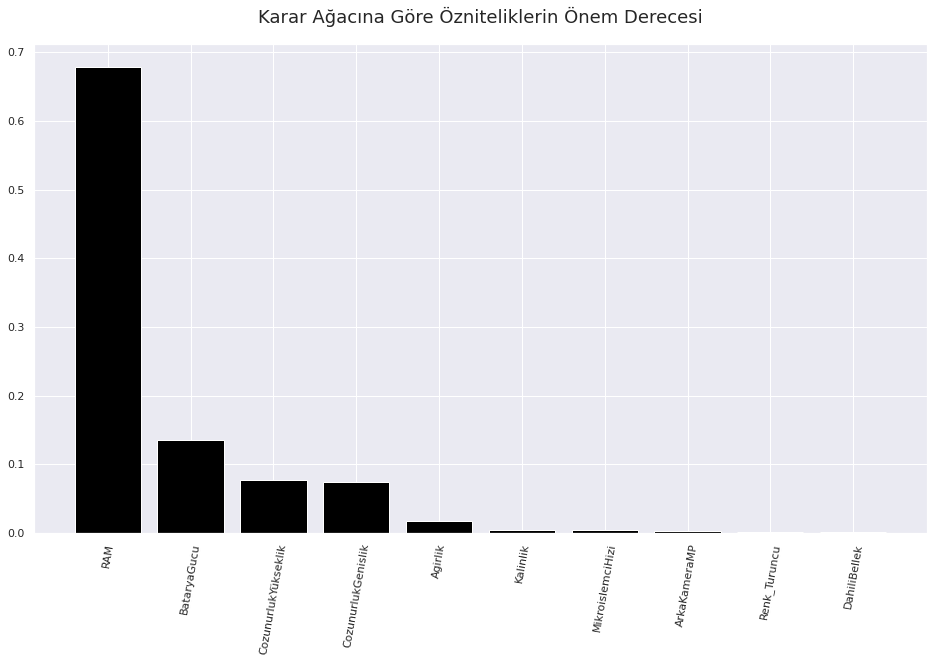

In [271]:
ranking = cart.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.figure(figsize = (16, 9))
plt.title("Karar Ağacına Göre Özniteliklerin Önem Derecesi", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="black", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

# KNN

In [272]:
knn_params = {"n_neighbors": np.arange(2,50)}

In [273]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 3)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [274]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor: 0.933531096860504
En iyi parametreler: {'n_neighbors': 13}


In [275]:
knn = KNeighborsClassifier(13)
knn_tuned = knn.fit(X_train, Y_train)

In [276]:
Y_pred = knn_tuned.predict(X_test)

In [277]:
accuracy_score(Y_test, Y_pred)

0.9266666666666666

In [278]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      Normal       0.91      0.89      0.90        71
      Pahali       0.95      0.97      0.96        71
        Ucuz       0.89      0.89      0.89        71
    Çok Ucuz       0.95      0.95      0.95        87

    accuracy                           0.93       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.93      0.93       300



In [279]:
karmasiklik_matrisi = confusion_matrix(Y_test, Y_pred)
print(karmasiklik_matrisi)

[[63  4  4  0]
 [ 2 69  0  0]
 [ 4  0 63  4]
 [ 0  0  4 83]]


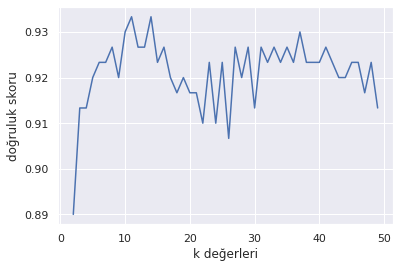

In [280]:
score_list = []

for each in range(2,50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,Y_train)
    score_list.append(knn2.score(X_test, Y_test))
    
plt.plot(range(2,50),score_list)
plt.xlabel("k değerleri")
plt.ylabel("doğruluk skoru")
plt.show()

In [281]:
cross_val_score(knn_tuned, X_test, Y_test, cv = 10)

array([0.86666667, 0.86666667, 0.93333333, 0.83333333, 0.93333333,
       0.83333333, 0.86666667, 0.96666667, 0.83333333, 0.93333333])

In [282]:
cross_val_score(knn_tuned, X_test, y_test, cv = 10).mean()

0.8866666666666665